In [1]:
import itertools
import platform
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import seaborn as sns
%precision 3
from matplotlib import pyplot as plt
%matplotlib inline
#그래프를 주피터 놋북에 그리기 위해
import numpy as np
import copy
from matplotlib import ticker
from scipy.stats import probplot
from sympy import Integral,  Symbol , pprint ,solve
from scipy import stats
import collections
import itertools
import math
#from varname import nameof
import sys
from scipy import stats
from collections import deque
import scipy
import sympy

#히스토그램 그리기
# Window
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin': # Mac
    matplotlib.rc('font', family='AppleGothic')
else: #linux
    matplotlib.rc('font', family='NanumGothic')

# 그래프에 마이너스 표시가 되도록 변경
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
font_location = 'C:/Windows/Fonts/MALGUNSL.TTF' #맑은고딕
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)

## 1. x = 1,2,3,4 n =2

In [2]:
a = list(itertools.product(np.arange(1,5) , repeat = 2))
print(a)
b = list(map(lambda x : np.mean(x) , a))
d = deque()
for i in zip(a,b):
    d.append(i)
c = sorted(list(set(list(map(lambda x : np.mean(x) , a)))))
print(b)
print(c)
print(d)

[(1, 1), (1, 2), (1, 3), (1, 4), (2, 1), (2, 2), (2, 3), (2, 4), (3, 1), (3, 2), (3, 3), (3, 4), (4, 1), (4, 2), (4, 3), (4, 4)]
[1.0, 1.5, 2.0, 2.5, 1.5, 2.0, 2.5, 3.0, 2.0, 2.5, 3.0, 3.5, 2.5, 3.0, 3.5, 4.0]
[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
deque([((1, 1), 1.0), ((1, 2), 1.5), ((1, 3), 2.0), ((1, 4), 2.5), ((2, 1), 1.5), ((2, 2), 2.0), ((2, 3), 2.5), ((2, 4), 3.0), ((3, 1), 2.0), ((3, 2), 2.5), ((3, 3), 3.0), ((3, 4), 3.5), ((4, 1), 2.5), ((4, 2), 3.0), ((4, 3), 3.5), ((4, 4), 4.0)])


In [3]:
d = deque(sorted(d , key = lambda x : x[1]))
e =[[] for i in range(len(c))]
# print(type(d))
# print(len(a))
p=0
print(len(d))

16


In [4]:
while len(d)>=2:
    if d[0][1] == d[1][1]:
        e[p].append(d[0][0])
        print(f'e: {e}')
        d.popleft()
        print(f'd: {d}')
    else:
        e[p].append(d[0][0])
        print(f'일치  x e: {e}')
        d.popleft()
        p+=1
e[p].append(d[-1][0])
e

일치  x e: [[(1, 1)], [], [], [], [], [], []]
e: [[(1, 1)], [(1, 2)], [], [], [], [], []]
d: deque([((2, 1), 1.5), ((1, 3), 2.0), ((2, 2), 2.0), ((3, 1), 2.0), ((1, 4), 2.5), ((2, 3), 2.5), ((3, 2), 2.5), ((4, 1), 2.5), ((2, 4), 3.0), ((3, 3), 3.0), ((4, 2), 3.0), ((3, 4), 3.5), ((4, 3), 3.5), ((4, 4), 4.0)])
일치  x e: [[(1, 1)], [(1, 2), (2, 1)], [], [], [], [], []]
e: [[(1, 1)], [(1, 2), (2, 1)], [(1, 3)], [], [], [], []]
d: deque([((2, 2), 2.0), ((3, 1), 2.0), ((1, 4), 2.5), ((2, 3), 2.5), ((3, 2), 2.5), ((4, 1), 2.5), ((2, 4), 3.0), ((3, 3), 3.0), ((4, 2), 3.0), ((3, 4), 3.5), ((4, 3), 3.5), ((4, 4), 4.0)])
e: [[(1, 1)], [(1, 2), (2, 1)], [(1, 3), (2, 2)], [], [], [], []]
d: deque([((3, 1), 2.0), ((1, 4), 2.5), ((2, 3), 2.5), ((3, 2), 2.5), ((4, 1), 2.5), ((2, 4), 3.0), ((3, 3), 3.0), ((4, 2), 3.0), ((3, 4), 3.5), ((4, 3), 3.5), ((4, 4), 4.0)])
일치  x e: [[(1, 1)], [(1, 2), (2, 1)], [(1, 3), (2, 2), (3, 1)], [], [], [], []]
e: [[(1, 1)], [(1, 2), (2, 1)], [(1, 3), (2, 2), (3, 1)], [(1,

[[(1, 1)],
 [(1, 2), (2, 1)],
 [(1, 3), (2, 2), (3, 1)],
 [(1, 4), (2, 3), (3, 2), (4, 1)],
 [(2, 4), (3, 3), (4, 2)],
 [(3, 4), (4, 3)],
 [(4, 4)]]

In [5]:
B = pd.DataFrame([e ,c]).T
B.rename(columns= {0 : '표본' , 1: '|X'} , inplace = True)
B
b_len = [len(i) for i in B['표본']]
b_len
B['표본길이'] = b_len
B['P(|X = x)'] = B['표본길이'] / len(a)
B['평균'] = B['|X'] * B['P(|X = x)']
B['분산'] = (B['|X']**2) * B['P(|X = x)']
B

,표본,|X,표본길이,P(|X = x),평균,분산
0,"[(1, 1)]",1.0,1,0.0625,0.0625,0.0625
1,"[(1, 2), (2, 1)]",1.5,2,0.1250,0.1875,0.28125
2,"[(1, 3), (2, 2), (3, 1)]",2.0,3,0.1875,0.375,0.75
3,"[(1, 4), (2, 3), (3, 2), (4, 1)]",2.5,4,0.2500,0.625,1.5625
4,"[(2, 4), (3, 3), (4, 2)]",3.0,3,0.1875,0.5625,1.6875
5,"[(3, 4), (4, 3)]",3.5,2,0.1250,0.4375,1.53125
6,"[(4, 4)]",4.0,1,0.0625,0.25,1.0


In [6]:
a =  pd.DataFrame(B[:].sum(axis=0))
# a.transpose()
a = a.transpose()
col_name = a.columns.tolist()

for i in range(len(col_name[:-3])):
    a.iloc[0][i] = '-'
a.iloc[0][3] = '결과값'

a.iloc[0][5] = a.iloc[0][5] - a.iloc[0][4]**2

B = pd.concat([B ,a])
B

,표본,|X,표본길이,P(|X = x),평균,분산
0,"[(1, 1)]",1.0,1,0.0625,0.0625,0.0625
1,"[(1, 2), (2, 1)]",1.5,2,0.125,0.1875,0.28125
2,"[(1, 3), (2, 2), (3, 1)]",2.0,3,0.1875,0.375,0.75
3,"[(1, 4), (2, 3), (3, 2), (4, 1)]",2.5,4,0.25,0.625,1.5625
4,"[(2, 4), (3, 3), (4, 2)]",3.0,3,0.1875,0.5625,1.6875
5,"[(3, 4), (4, 3)]",3.5,2,0.125,0.4375,1.53125
6,"[(4, 4)]",4.0,1,0.0625,0.25,1.0
0,-,-,-,결과값,2.5,0.625


In [7]:
C = B.iloc[ :-1 , [1, 3]]
C = C.set_index('|X')
C = C.T
C

|X,1.0,1.5,2.0,2.5,3.0,3.5,4.0
P(|X = x),0.0625,0.125,0.1875,0.25,0.1875,0.125,0.0625


[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
[0.0625, 0.125, 0.1875, 0.25, 0.1875, 0.125, 0.0625]


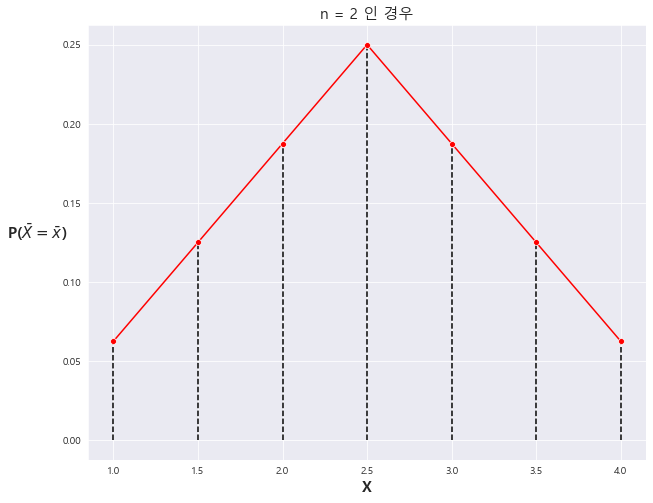

In [8]:
x= C.columns.tolist()
print(x)
# x = np.arange(7)
# print(x)
y = C.iloc[0, :].tolist()
print(y)

fig = plt.figure(figsize=(10,8)) #plt는 matplotlib의 약자
fig.set_facecolor('white')

ax = sns.lineplot(x=x, y=y,
                  color='r', # 색상
                  linestyle='-', # 라인 스타일
                  marker='o') # 마커
#ax 변수에 저장
ax.set_title('n = 2 인 경우' , fontsize = 15)
ax.set_xlabel('X', fontsize = 15 , fontweight = 'bold')
ax.set_ylabel(r'P($\bar X = \bar x$)' , fontsize = 15 , fontweight = 'bold' , rotation = 0 , labelpad=25)
# ax.set_xticklabels(x, fontsize=15) #set_xticklabels(축별 이름 , font 크기)


ax.vlines(x= x, ymin= 0 , ymax= [y] , color = 'black' , linestyle ='dashed' , label ='{}'.format(2) , )

## x = 1 , 2, 3, 4 // n = 3

In [9]:
a = list(itertools.product(np.arange(1,5) , repeat = 3))
# print(a)
b = list(map(lambda x : np.mean(x) , a))
d = deque()
for i in zip(a,b):
    d.append(i)
c = sorted(list(set(list(map(lambda x : np.mean(x) , a)))))


d = deque(sorted(d , key = lambda x : x[1]))
e =[[] for i in range(len(c))]
# print(type(d))
# print(len(a))
p=0

while len(d)>=2:
    if d[0][1] == d[1][1]:
        e[p].append(d[0][0])
        # print(f'e: {e}')
        d.popleft()
        # print(f'd: {d}')
    else:
        e[p].append(d[0][0])
        # print(f'일치  x e: {e}')
        d.popleft()
        p+=1
e[p].append(d[-1][0])

B = pd.DataFrame([e ,c]).T
B.rename(columns= {0 : '표본' , 1: '|X'} , inplace = True)
B
b_len = [len(i) for i in B['표본']]
b_len
B['표본길이'] = b_len
B['P(|X = x)'] = B['표본길이'] / len(a)
B['평균'] = B['|X'] * B['P(|X = x)']
B['분산'] = (B['|X']**2) * B['P(|X = x)']


a =  pd.DataFrame(B[:].sum(axis=0))
# a.transpose()
a = a.transpose()
col_name = a.columns.tolist()

for i in range(len(col_name[:-3])):
    a.iloc[0][i] = '-'
a.iloc[0][3] = '결과값'

a.iloc[0][5] = a.iloc[0][5] - a.iloc[0][4]**2

B = pd.concat([B ,a])
B

,표본,|X,표본길이,P(|X = x),평균,분산
0,"[(1, 1, 1)]",1.0,1,0.015625,0.015625,0.015625
1,"[(1, 1, 2), (1, 2, 1), (2, 1, 1)]",1.333333,3,0.046875,0.0625,0.083333
2,"[(1, 1, 3), (1, 2, 2), (1, 3, 1), (2, 1, 2), (...",1.666667,6,0.09375,0.15625,0.260417
3,"[(1, 1, 4), (1, 2, 3), (1, 3, 2), (1, 4, 1), (...",2.0,10,0.15625,0.3125,0.625
4,"[(1, 2, 4), (1, 3, 3), (1, 4, 2), (2, 1, 4), (...",2.333333,12,0.1875,0.4375,1.020833
5,"[(1, 3, 4), (1, 4, 3), (2, 2, 4), (2, 3, 3), (...",2.666667,12,0.1875,0.5,1.333333
6,"[(1, 4, 4), (2, 3, 4), (2, 4, 3), (3, 2, 4), (...",3.0,10,0.15625,0.46875,1.40625
7,"[(2, 4, 4), (3, 3, 4), (3, 4, 3), (4, 2, 4), (...",3.333333,6,0.09375,0.3125,1.041667
8,"[(3, 4, 4), (4, 3, 4), (4, 4, 3)]",3.666667,3,0.046875,0.171875,0.630208
9,"[(4, 4, 4)]",4.0,1,0.015625,0.0625,0.25


In [10]:
C = B.iloc[ :-1 , [1, 3]]
C = C.set_index('|X')
C = C.T
C

|X,1.000000,1.333333,1.666667,2.000000,2.333333,2.666667,3.000000,3.333333,3.666667,4.000000
P(|X = x),0.015625,0.046875,0.09375,0.15625,0.1875,0.1875,0.15625,0.09375,0.046875,0.015625


[1.0, 1.3333333333333333, 1.6666666666666667, 2.0, 2.3333333333333335, 2.6666666666666665, 3.0, 3.3333333333333335, 3.6666666666666665, 4.0]
[0.015625, 0.046875, 0.09375, 0.15625, 0.1875, 0.1875, 0.15625, 0.09375, 0.046875, 0.015625]


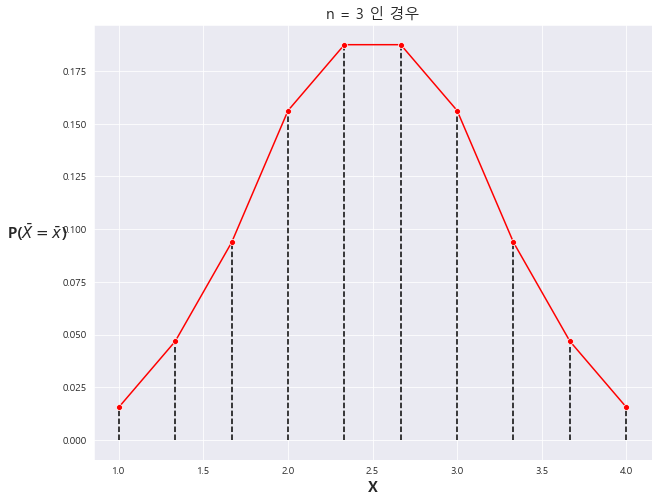

In [11]:
x= C.columns.tolist()
print(x)
# x = np.arange(7)
# print(x)
y = C.iloc[0, :].tolist()
print(y)

fig = plt.figure(figsize=(10,8)) #plt는 matplotlib의 약자
fig.set_facecolor('white')

ax = sns.lineplot(x=x, y=y,
                  color='r', # 색상
                  linestyle='-', # 라인 스타일
                  marker='o') # 마커
#ax 변수에 저장
ax.set_title('n = 3 인 경우' , fontsize = 15)
ax.set_xlabel('X', fontsize = 15 , fontweight = 'bold')
ax.set_ylabel(r'P($\bar X = \bar x$)' , fontsize = 15 , fontweight = 'bold' , rotation = 0 , labelpad=25)
# ax.set_xticklabels(x, fontsize=15) #set_xticklabels(축별 이름 , font 크기)


ax.vlines(x= x, ymin= 0 , ymax= [y] , color = 'black' , linestyle ='dashed' , label ='{}'.format(2) , )

## x = 1 , 2, 3, 4 // n = 4

In [12]:
a = list(itertools.product(np.arange(1,5) , repeat = 4))
# print(a)
b = list(map(lambda x : np.mean(x) , a))
d = deque()
for i in zip(a,b):
    d.append(i)
c = sorted(list(set(list(map(lambda x : np.mean(x) , a)))))


d = deque(sorted(d , key = lambda x : x[1]))
e =[[] for i in range(len(c))]
# print(type(d))
# print(len(a))
p=0

while len(d)>=2:
    if d[0][1] == d[1][1]:
        e[p].append(d[0][0])
        # print(f'e: {e}')
        d.popleft()
        # print(f'd: {d}')
    else:
        e[p].append(d[0][0])
        # print(f'일치  x e: {e}')
        d.popleft()
        p+=1
e[p].append(d[-1][0])

B = pd.DataFrame([e ,c]).T
B.rename(columns= {0 : '표본' , 1: '|X'} , inplace = True)
B
b_len = [len(i) for i in B['표본']]
b_len
B['표본길이'] = b_len
B['P(|X = x)'] = B['표본길이'] / len(a)
B['평균'] = B['|X'] * B['P(|X = x)']
B['분산'] = (B['|X']**2) * B['P(|X = x)']


a =  pd.DataFrame(B[:].sum(axis=0))
# a.transpose()
a = a.transpose()
col_name = a.columns.tolist()

for i in range(len(col_name[:-3])):
    a.iloc[0][i] = '-'
a.iloc[0][3] = '결과값'

a.iloc[0][5] = a.iloc[0][5] - a.iloc[0][4]**2

B = pd.concat([B ,a])
B



,표본,|X,표본길이,P(|X = x),평균,분산
0,"[(1, 1, 1, 1)]",1.0,1,0.003906,0.003906,0.003906
1,"[(1, 1, 1, 2), (1, 1, 2, 1), (1, 2, 1, 1), (2,...",1.25,4,0.015625,0.019531,0.024414
2,"[(1, 1, 1, 3), (1, 1, 2, 2), (1, 1, 3, 1), (1,...",1.5,10,0.039062,0.058594,0.087891
3,"[(1, 1, 1, 4), (1, 1, 2, 3), (1, 1, 3, 2), (1,...",1.75,20,0.078125,0.136719,0.239258
4,"[(1, 1, 2, 4), (1, 1, 3, 3), (1, 1, 4, 2), (1,...",2.0,31,0.121094,0.242188,0.484375
5,"[(1, 1, 3, 4), (1, 1, 4, 3), (1, 2, 2, 4), (1,...",2.25,40,0.15625,0.351562,0.791016
6,"[(1, 1, 4, 4), (1, 2, 3, 4), (1, 2, 4, 3), (1,...",2.5,44,0.171875,0.429688,1.074219
7,"[(1, 2, 4, 4), (1, 3, 3, 4), (1, 3, 4, 3), (1,...",2.75,40,0.15625,0.429688,1.181641
8,"[(1, 3, 4, 4), (1, 4, 3, 4), (1, 4, 4, 3), (2,...",3.0,31,0.121094,0.363281,1.089844
9,"[(1, 4, 4, 4), (2, 3, 4, 4), (2, 4, 3, 4), (2,...",3.25,20,0.078125,0.253906,0.825195


In [13]:
C = B.iloc[ :-1 , [1, 3]]
C = C.set_index('|X')
C = C.T
C

|X,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00
P(|X = x),0.003906,0.015625,0.039062,0.078125,0.121094,0.15625,0.171875,0.15625,0.121094,0.078125,0.039062,0.015625,0.003906


[1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0]
[0.00390625, 0.015625, 0.0390625, 0.078125, 0.12109375, 0.15625, 0.171875, 0.15625, 0.12109375, 0.078125, 0.0390625, 0.015625, 0.00390625]


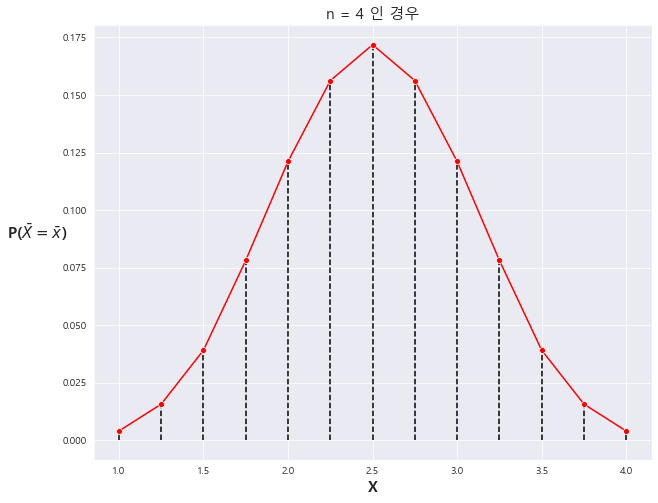

In [14]:
x= C.columns.tolist()
print(x)
# x = np.arange(7)
# print(x)
y = C.iloc[0, :].tolist()
print(y)

fig = plt.figure(figsize=(10,8)) #plt는 matplotlib의 약자
fig.set_facecolor('white')

ax = sns.lineplot(x=x, y=y,
                  color='r', # 색상
                  linestyle='-', # 라인 스타일
                  marker='o') # 마커
#ax 변수에 저장
ax.set_title('n = 4 인 경우' , fontsize = 15)
ax.set_xlabel('X', fontsize = 15 , fontweight = 'bold')
ax.set_ylabel(r'P($\bar X = \bar x$)' , fontsize = 15 , fontweight = 'bold' , rotation = 0 , labelpad=25)
# ax.set_xticklabels(x, fontsize=15) #set_xticklabels(축별 이름 , font 크기)


ax.vlines(x= x, ymin= 0 , ymax= [y] , color = 'black' , linestyle ='dashed' , label ='{}'.format(2) , )

## x = 1 , 2, 3, 4 // n = 5

In [15]:
a = list(itertools.product(np.arange(1,5) , repeat = 5))
# print(a)
b = list(map(lambda x : np.mean(x) , a))
d = deque()
for i in zip(a,b):
    d.append(i)
c = sorted(list(set(list(map(lambda x : np.mean(x) , a)))))


d = deque(sorted(d , key = lambda x : x[1]))
e =[[] for i in range(len(c))]
# print(type(d))
# print(len(a))
p=0

while len(d)>=2:
    if d[0][1] == d[1][1]:
        e[p].append(d[0][0])
        # print(f'e: {e}')
        d.popleft()
        # print(f'd: {d}')
    else:
        e[p].append(d[0][0])
        # print(f'일치  x e: {e}')
        d.popleft()
        p+=1
e[p].append(d[-1][0])

B = pd.DataFrame([e ,c]).T
B.rename(columns= {0 : '표본' , 1: '|X'} , inplace = True)
B
b_len = [len(i) for i in B['표본']]
b_len
B['표본길이'] = b_len
B['P(|X = x)'] = B['표본길이'] / len(a)
B['평균'] = B['|X'] * B['P(|X = x)']
B['분산'] = (B['|X']**2) * B['P(|X = x)']


a =  pd.DataFrame(B[:].sum(axis=0))
# a.transpose()
a = a.transpose()
col_name = a.columns.tolist()

for i in range(len(col_name[:-3])):
    a.iloc[0][i] = '-'
a.iloc[0][3] = '결과값'

a.iloc[0][5] = a.iloc[0][5] - a.iloc[0][4]**2

B = pd.concat([B ,a])
B



,표본,|X,표본길이,P(|X = x),평균,분산
0,"[(1, 1, 1, 1, 1)]",1.0,1,0.000977,0.000977,0.000977
1,"[(1, 1, 1, 1, 2), (1, 1, 1, 2, 1), (1, 1, 2, 1...",1.2,5,0.004883,0.005859,0.007031
2,"[(1, 1, 1, 1, 3), (1, 1, 1, 2, 2), (1, 1, 1, 3...",1.4,15,0.014648,0.020508,0.028711
3,"[(1, 1, 1, 1, 4), (1, 1, 1, 2, 3), (1, 1, 1, 3...",1.6,35,0.03418,0.054688,0.0875
4,"[(1, 1, 1, 2, 4), (1, 1, 1, 3, 3), (1, 1, 1, 4...",1.8,65,0.063477,0.114258,0.205664
5,"[(1, 1, 1, 3, 4), (1, 1, 1, 4, 3), (1, 1, 2, 2...",2.0,101,0.098633,0.197266,0.394531
6,"[(1, 1, 1, 4, 4), (1, 1, 2, 3, 4), (1, 1, 2, 4...",2.2,135,0.131836,0.290039,0.638086
7,"[(1, 1, 2, 4, 4), (1, 1, 3, 3, 4), (1, 1, 3, 4...",2.4,155,0.151367,0.363281,0.871875
8,"[(1, 1, 3, 4, 4), (1, 1, 4, 3, 4), (1, 1, 4, 4...",2.6,155,0.151367,0.393555,1.023242
9,"[(1, 1, 4, 4, 4), (1, 2, 3, 4, 4), (1, 2, 4, 3...",2.8,135,0.131836,0.369141,1.033594


In [16]:
C = B.iloc[ :-1 , [1, 3]]
C = C.set_index('|X')
C = C.T
C

|X,1.0,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0,3.2,3.4,3.6,3.8,4.0
P(|X = x),0.000977,0.004883,0.014648,0.03418,0.063477,0.098633,0.131836,0.151367,0.151367,0.131836,0.098633,0.063477,0.03418,0.014648,0.004883,0.000977


[1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0]
[0.0009765625, 0.0048828125, 0.0146484375, 0.0341796875, 0.0634765625, 0.0986328125, 0.1318359375, 0.1513671875, 0.1513671875, 0.1318359375, 0.0986328125, 0.0634765625, 0.0341796875, 0.0146484375, 0.0048828125, 0.0009765625]


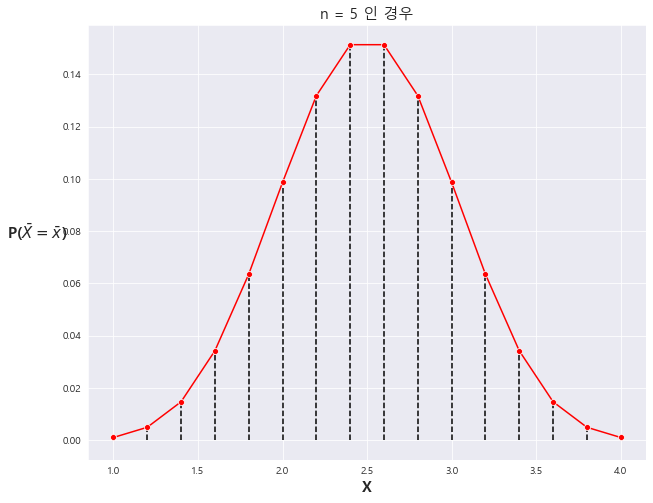

In [17]:
x= C.columns.tolist()
print(x)
# x = np.arange(7)
# print(x)
y = C.iloc[0, :].tolist()
print(y)

fig = plt.figure(figsize=(10,8)) #plt는 matplotlib의 약자
fig.set_facecolor('white')

ax = sns.lineplot(x=x, y=y,
                  color='r', # 색상
                  linestyle='-', # 라인 스타일
                  marker='o') # 마커
#ax 변수에 저장
ax.set_title('n = 5 인 경우' , fontsize = 15)
ax.set_xlabel('X', fontsize = 15 , fontweight = 'bold')
ax.set_ylabel(r'P($\bar X = \bar x$)' , fontsize = 15 , fontweight = 'bold' , rotation = 0 , labelpad=25)
# ax.set_xticklabels(x, fontsize=15) #set_xticklabels(축별 이름 , font 크기)


ax.vlines(x= x, ymin= 0 , ymax= [y] , color = 'black' , linestyle ='dashed' , label ='{}'.format(2) , )

C:\Users\andyp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


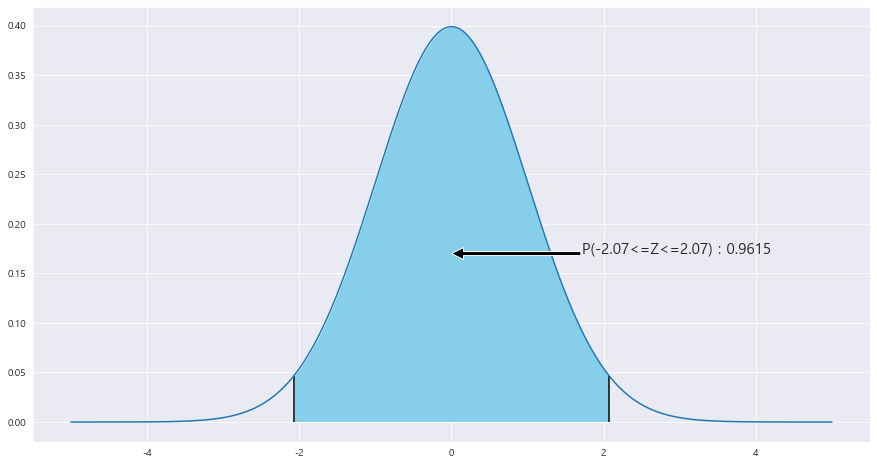

In [18]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((33-32) / math.sqrt(8.41/36) ,2)
# z_2 = round((21.5-20) / 0.833 , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>= -z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_1)) - stats.norm.cdf(0)) * 2
ax.text(1.71 , .17, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(0, .17), xytext=(1.7 , .17)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

C:\Users\andyp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


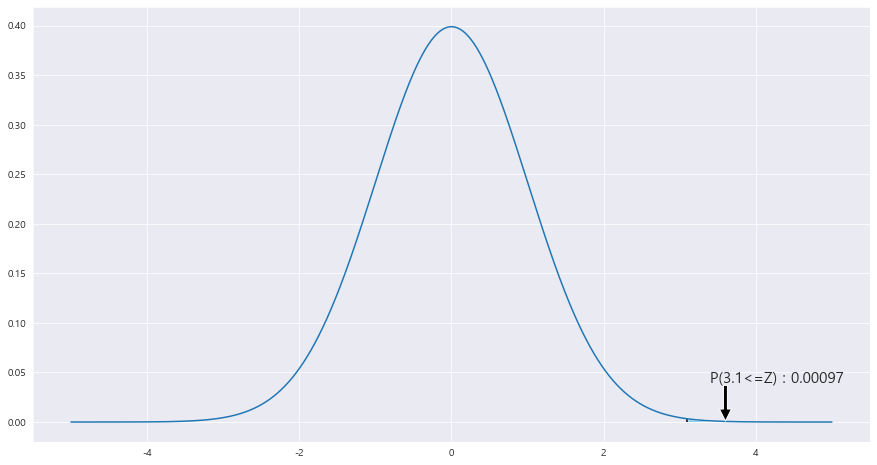

In [19]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((33.5-32) / math.sqrt(8.41/36) ,2)
# z_2 = round((21.5-20) / 0.833 , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where =  (x>= z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  1- (stats.norm.cdf((z_1)))
ax.text(3.4, .04, f'P({z_1}<=Z) : {round(area,5)}',fontsize=15)
plt.annotate('' , xy=(3.6, .001), xytext=(3.6 , .037)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))


C:\Users\andyp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


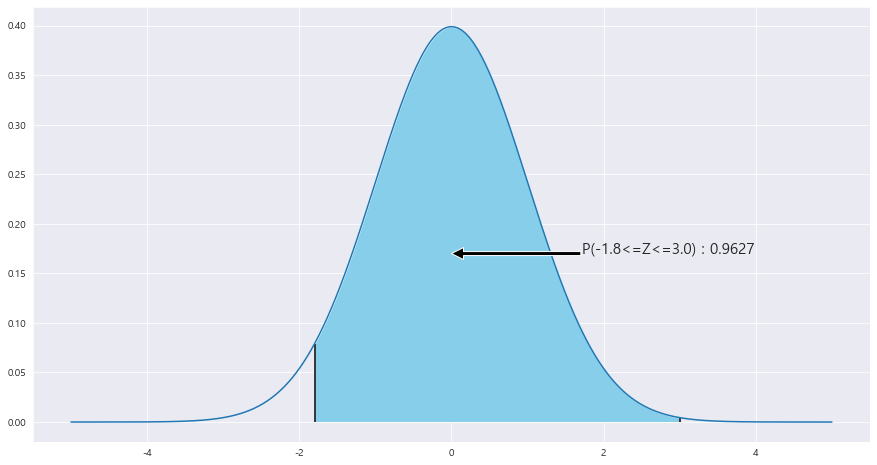

In [20]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((176-185) / math.sqrt(900/36) ,2)
z_2 = round((200-185) / math.sqrt(900/36) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_2) & (x>= z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_2)) - stats.norm.cdf(z_1))
ax.text(1.71 , .17, f'P({z_1}<=Z<={z_2}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(0, .17), xytext=(1.7 , .17)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_2, ymin= 0 , ymax= stats.norm.pdf(z_2, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

C:\Users\andyp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


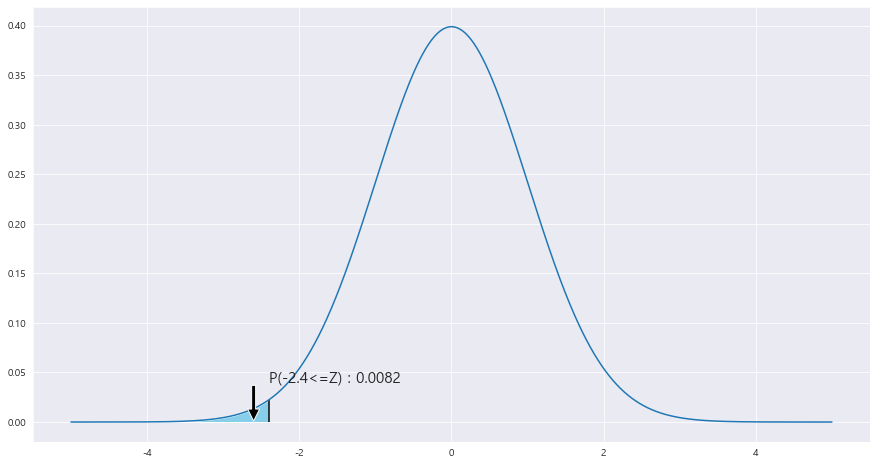

In [21]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((173-185) / math.sqrt(900/36) ,2)
# z_2 = round((21.5-20) / 0.833 , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where =  (x<= z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_1)))
ax.text(-2.4, .04, f'P({z_1}<=Z) : {round(area,5)}',fontsize=15)
plt.annotate('' , xy=(-2.6, .001), xytext=(-2.6 , .037)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))


In [22]:
a = [4.23 , 4.26 , 4.26 , 4.24 , 4.27 , 4.23 , 4.19 , 4.27 , 4.21 , 4.25 , 4.23 , 4.29 , 4.30 , 4.24 , 4.20 , 4.24]

print(np.mean(a))

print(np.var(a, ddof = 1))

4.244375
0.0009195833333333218


In [23]:
# x_0 = Symbol('x_0')
#
sik = (15*(0.00092)) / 0.000756

# print(15*(0.0009**2))
# # print(solve(sik))
#
print(sik)

18.253968253968253


18.25
0.05074739102413785
0.24975051899935352
['$\\chi^2(\\eta$ = 15)']


C:\Users\andyp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


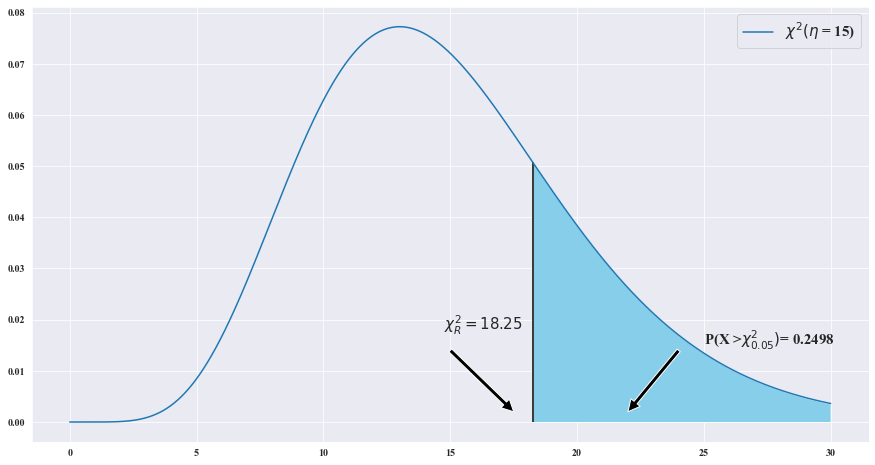

In [24]:
matplotlib.rc("font" , family = "Times New Roman" , weight = "bold")

X = np.arange(0,30,.01)

fig = plt.figure(figsize=(15,8))
dof = 15 #자유도

ax = sns.lineplot(X , scipy.stats.chi2(dof).pdf(X))

# X_r = scipy.stats.chi2(dof).pdf(18.25) #==> 7.285
# X_r = scipy.stats.chi2(dof).cdf(X_r)
#X_r = 10 + math.sqrt(20)*1.644 #평균 = n , 분산 = 2n
X_r = 18.25
print(X_r)

chai = scipy.stats.chi2(dof).pdf(18.25)
print(chai)
#P(X<X_l) = 0.05
# X_l = scipy.stats.chi2(dof).cdf(0.05) #==> 1.644
#
# print(X_l)




ax.fill_between(X, scipy.stats.chi2(dof).pdf(X) , where = (X>=X_r) , facecolor = 'skyblue') # x값 , y값 , 0 , x조건 인곳 , 색깔
area = 1- scipy.stats.chi2(dof).cdf(X_r) #넓이 구하기!!!!!
print(area)
ax.text(25 , .015, 'P(X >' + r'$\chi^2_{0.05})$'  + f"= {round(area,4)}",fontsize=15)
plt.annotate('' , xy=(22, .002), xytext=(24 , .014)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= X_r, ymin= 0 , ymax= scipy.stats.chi2(dof).pdf(X_r) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))




#
# # ax.vlines(x= X_l, ymin= 0 , ymax= scipy.stats.chi2(dof).pdf(X_l) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
# # area = scipy.stats.chi2(dof).cdf(X_l) #넓이 구하기!!!!!
# ax.text(-1 , .02, 'P(X >' + r'$\chi^2_{0.05}$)' + f"= {round(area,4)}",fontsize=15)
#
# # ax.text(X_l + 1, .02,  r'$\chi^2_L= {}$'.format(round(X_l,2)) ,fontsize=15)
ax.text(X_r - 3.5, .018,  r'$\chi^2_R= {}$'.format(round(X_r,2)) ,fontsize=15)
plt.annotate('' , xy=(17.5, .002), xytext=(15 , .014)  , arrowprops = dict(facecolor = 'black'))




b = [r'$\chi^2(\eta$ = {})'.format(15)]
print(b)
plt.legend(b , fontsize = 15)

18.25
0.05074739102413785
0.24975051899935352
['$\\chi^2(\\eta$ = 15)']


C:\Users\andyp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


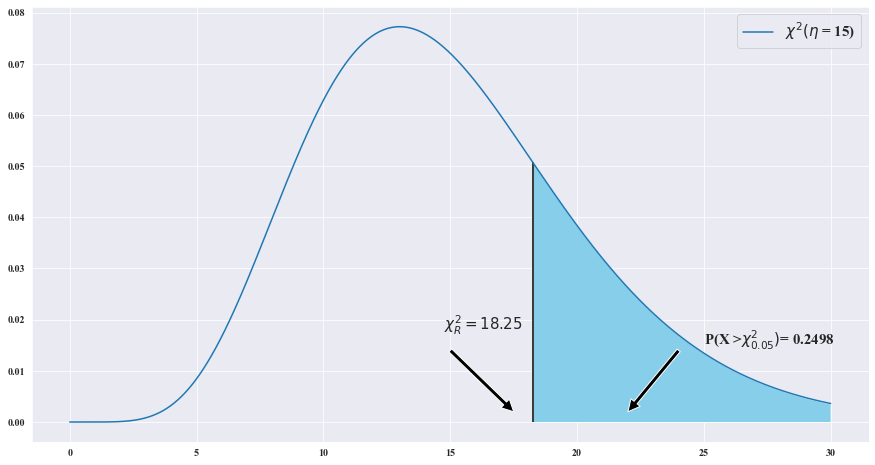

In [25]:
matplotlib.rc("font" , family = "Times New Roman" , weight = "bold")

X = np.arange(0,30,.01)

fig = plt.figure(figsize=(15,8))
dof = 15 #자유도

ax = sns.lineplot(X , scipy.stats.chi2(dof).pdf(X))

X_r = 18.25
print(X_r)

chai = scipy.stats.chi2(dof).pdf(18.25)
print(chai)



ax.fill_between(X, scipy.stats.chi2(dof).pdf(X) , where = (X>=X_r) , facecolor = 'skyblue') # x값 , y값 , 0 , x조건 인곳 , 색깔
area = 1- scipy.stats.chi2(dof).cdf(X_r) #넓이 구하기!!!!!
print(area)
ax.text(25 , .015, 'P(X >' + r'$\chi^2_{0.05})$'  + f"= {round(area,4)}",fontsize=15)
plt.annotate('' , xy=(22, .002), xytext=(24 , .014)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= X_r, ymin= 0 , ymax= scipy.stats.chi2(dof).pdf(X_r) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))


ax.text(X_r - 3.5, .018,  r'$\chi^2_R= {}$'.format(round(X_r,2)) ,fontsize=15)
plt.annotate('' , xy=(17.5, .002), xytext=(15 , .014)  , arrowprops = dict(facecolor = 'black'))


b = [r'$\chi^2(\eta$ = {})'.format(15)]
print(b)
plt.legend(b , fontsize = 15)

In [26]:
a = [12.5 , 11.5 , 6.0, 5.5 , 15.5 , 11.5 , 10.5 , 17.5 , 10.0 , 9.5 , 13.5 , 8.5 , 11.5 , 15.5 , 10.5]

print(np.mean(a))
print(np.var(a , ddof = 1))

11.3
11.135714285714286


In [27]:
print(14 * 11.1357 / 8.03)

19.414669987546702


19.414
0.04366139417781637
0.14972531566818337
['$\\chi^2(\\eta$ = 14)']


C:\Users\andyp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


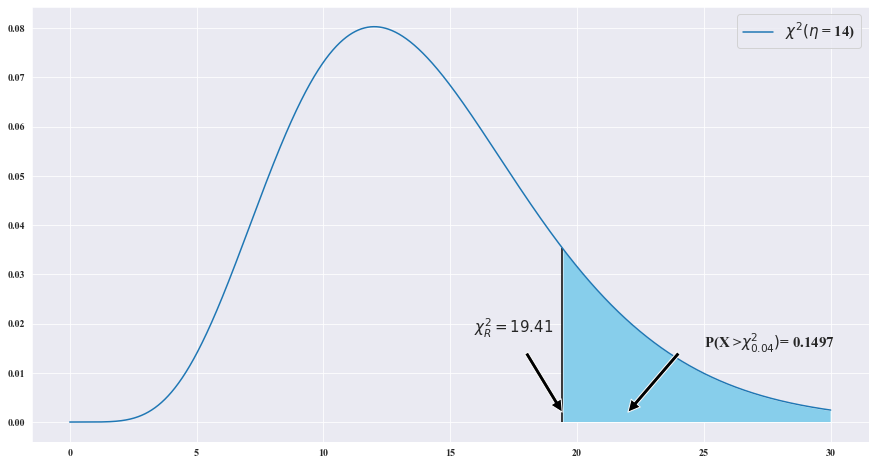

In [28]:
matplotlib.rc("font" , family = "Times New Roman" , weight = "bold")

X = np.arange(0,30,.01)

fig = plt.figure(figsize=(15,8))
dof = 14 #자유도

ax = sns.lineplot(X , scipy.stats.chi2(dof).pdf(X))

X_r = 19.414
print(X_r)

chai = scipy.stats.chi2(dof).pdf(18.25)
print(chai)



ax.fill_between(X, scipy.stats.chi2(dof).pdf(X) , where = (X>=X_r) , facecolor = 'skyblue') # x값 , y값 , 0 , x조건 인곳 , 색깔
area = 1- scipy.stats.chi2(dof).cdf(X_r) #넓이 구하기!!!!!
print(area)
ax.text(25 , .015, 'P(X >' + r'$\chi^2_{0.04})$'  + f"= {round(area,4)}",fontsize=15)
plt.annotate('' , xy=(22, .002), xytext=(24 , .014)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= X_r, ymin= 0 , ymax= scipy.stats.chi2(dof).pdf(X_r) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))


ax.text(X_r - 3.5, .018,  r'$\chi^2_R= {}$'.format(round(X_r,2)) ,fontsize=15)
plt.annotate('' , xy=(19.41, .002), xytext=(18 , .014)  , arrowprops = dict(facecolor = 'black'))


b = [r'$\chi^2(\eta$ = {})'.format(14)]
print(b)
plt.legend(b , fontsize = 15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


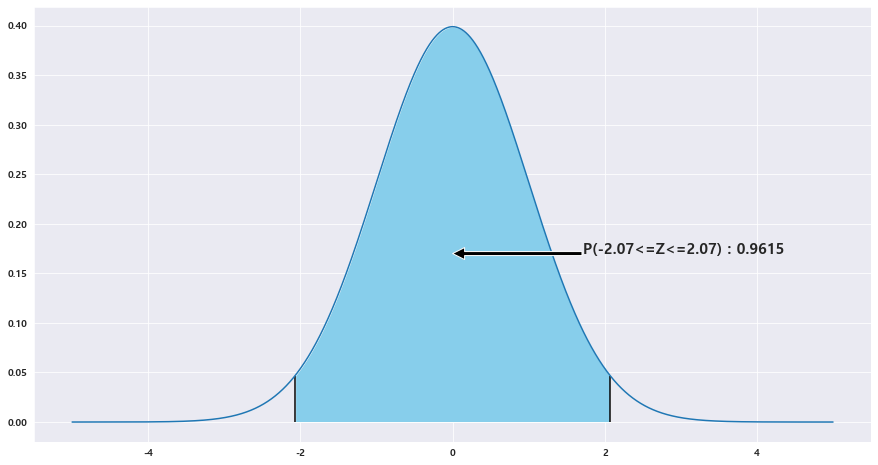

In [68]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((33-32) / math.sqrt(8.41/36) ,2)
# z_2 = round((21.5-20) / 0.833 , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_1) & (x>= -z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_1)) - stats.norm.cdf(0)) * 2
ax.text(1.71 , .17, f'P({-z_1}<=Z<={z_1}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(0, .17), xytext=(1.7 , .17)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= -z_1, ymin= 0 , ymax= stats.norm.pdf(-z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


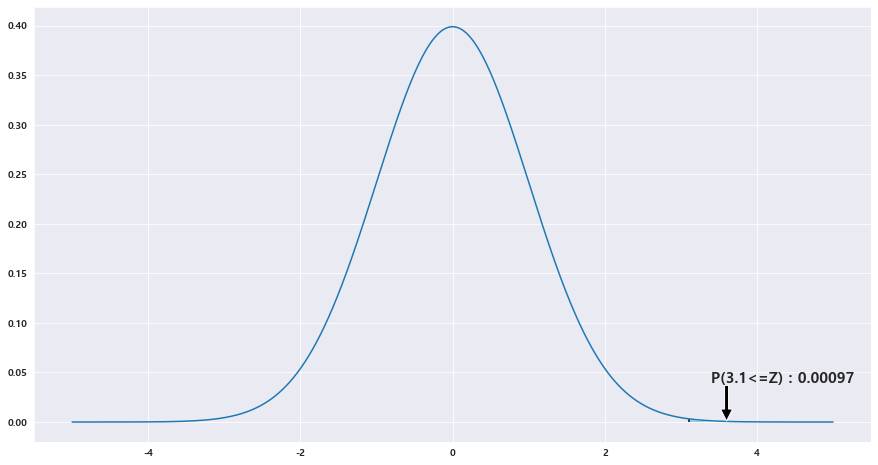

In [69]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((33.5-32) / math.sqrt(8.41/36) ,2)
# z_2 = round((21.5-20) / 0.833 , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where =  (x>= z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  1- (stats.norm.cdf((z_1)))
ax.text(3.4, .04, f'P({z_1}<=Z) : {round(area,5)}',fontsize=15)
plt.annotate('' , xy=(3.6, .001), xytext=(3.6 , .037)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


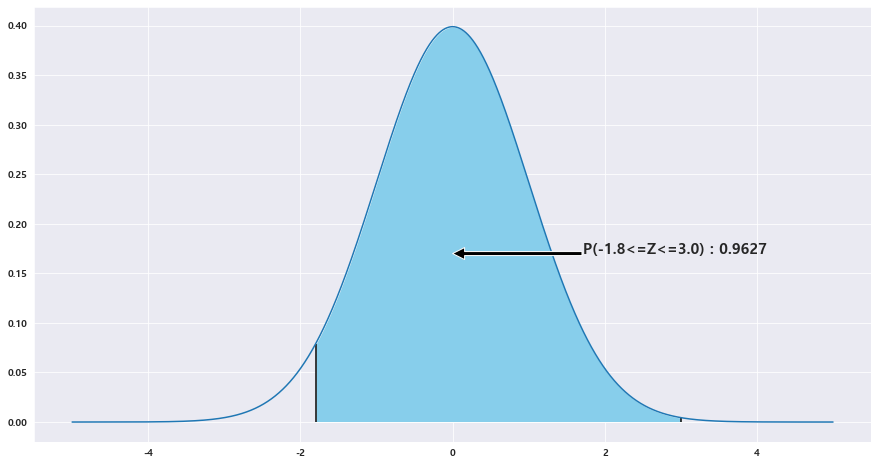

In [70]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((176-185) / math.sqrt(900/36) ,2)
z_2 = round((200-185) / math.sqrt(900/36) , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where = (x<=z_2) & (x>= z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_2)) - stats.norm.cdf(z_1))
ax.text(1.71 , .17, f'P({z_1}<=Z<={z_2}) : {round(area,4)}',fontsize=15)
plt.annotate('' , xy=(0, .17), xytext=(1.7 , .17)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
ax.vlines(x= z_2, ymin= 0 , ymax= stats.norm.pdf(z_2, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


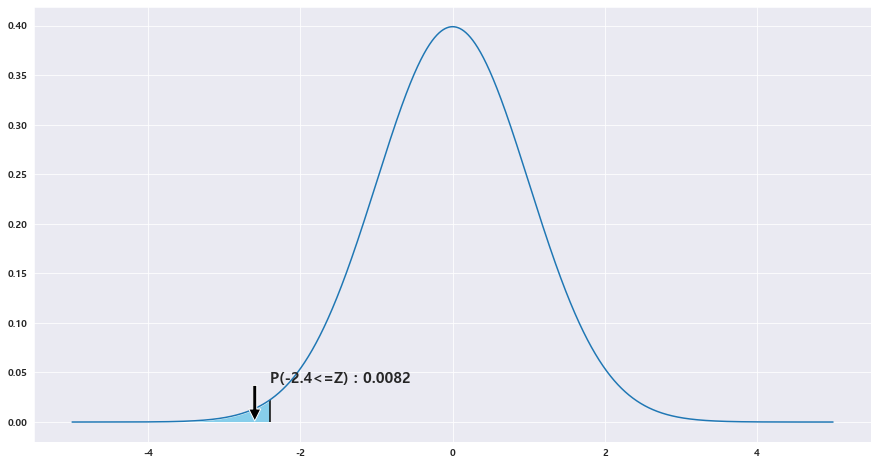

In [71]:
x = np.arange(-5,5 , .001)

fig = plt.figure(figsize=(15,8))

ax = sns.lineplot(x , stats.norm.pdf(x, loc=0 , scale =1)) #정의역 범위 , 평균 = 0 , 표준편차 =1 인 정규분포 플롯

z_1 = round((173-185) / math.sqrt(900/36) ,2)
# z_2 = round((21.5-20) / 0.833 , 2)

ax.fill_between(x, stats.norm.pdf(x, loc=0 , scale =1) , 0 , where =  (x<= z_1) , facecolor = 'skyblue') # x값 , y값 , 0 , x<=0 인곳 , 색깔



area =  (stats.norm.cdf((z_1)))
ax.text(-2.4, .04, f'P({z_1}<=Z) : {round(area,5)}',fontsize=15)
plt.annotate('' , xy=(-2.6, .001), xytext=(-2.6 , .037)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= z_1, ymin= 0 , ymax= stats.norm.pdf(z_1, loc=0 , scale =1) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))


In [72]:
a = [4.23 , 4.26 , 4.26 , 4.24 , 4.27 , 4.23 , 4.19 , 4.27 , 4.21 , 4.25 , 4.23 , 4.29 , 4.30 , 4.24 , 4.20 , 4.24]

print(np.mean(a))

print(np.var(a, ddof = 1))

4.244375
0.0009195833333333218


In [73]:
# x_0 = Symbol('x_0')
#
sik = (15*(0.00092)) / 0.000756

# print(15*(0.0009**2))
# # print(solve(sik))
#
print(sik)

18.253968253968253


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


18.25
0.05074739102413785
0.24975051899935352
['$\\chi^2(\\eta$ = 15)']


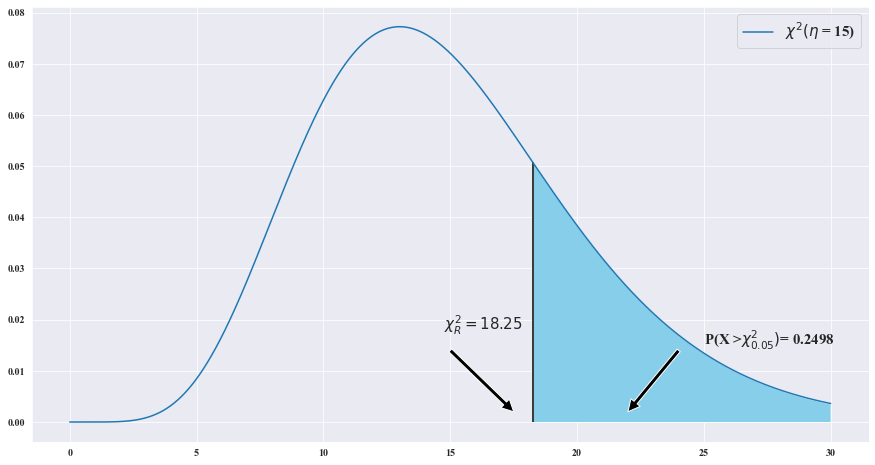

In [120]:
matplotlib.rc("font" , family = "Times New Roman" , weight = "bold")

X = np.arange(0,30,.01)

fig = plt.figure(figsize=(15,8))
dof = 15 #자유도

ax = sns.lineplot(X , scipy.stats.chi2(dof).pdf(X))

# X_r = scipy.stats.chi2(dof).pdf(18.25) #==> 7.285
# X_r = scipy.stats.chi2(dof).cdf(X_r)
#X_r = 10 + math.sqrt(20)*1.644 #평균 = n , 분산 = 2n
X_r = 18.25
print(X_r)

chai = scipy.stats.chi2(dof).pdf(18.25)
print(chai)
#P(X<X_l) = 0.05
# X_l = scipy.stats.chi2(dof).cdf(0.05) #==> 1.644
#
# print(X_l)




ax.fill_between(X, scipy.stats.chi2(dof).pdf(X) , where = (X>=X_r) , facecolor = 'skyblue') # x값 , y값 , 0 , x조건 인곳 , 색깔
area = 1- scipy.stats.chi2(dof).cdf(X_r) #넓이 구하기!!!!!
print(area)
ax.text(25 , .015, 'P(X >' + r'$\chi^2_{0.05})$'  + f"= {round(area,4)}",fontsize=15)
plt.annotate('' , xy=(22, .002), xytext=(24 , .014)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= X_r, ymin= 0 , ymax= scipy.stats.chi2(dof).pdf(X_r) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))




#
# # ax.vlines(x= X_l, ymin= 0 , ymax= scipy.stats.chi2(dof).pdf(X_l) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))
# # area = scipy.stats.chi2(dof).cdf(X_l) #넓이 구하기!!!!!
# ax.text(-1 , .02, 'P(X >' + r'$\chi^2_{0.05}$)' + f"= {round(area,4)}",fontsize=15)
#
# # ax.text(X_l + 1, .02,  r'$\chi^2_L= {}$'.format(round(X_l,2)) ,fontsize=15)
ax.text(X_r - 3.5, .018,  r'$\chi^2_R= {}$'.format(round(X_r,2)) ,fontsize=15)
plt.annotate('' , xy=(17.5, .002), xytext=(15 , .014)  , arrowprops = dict(facecolor = 'black'))




b = [r'$\chi^2(\eta$ = {})'.format(15)]
print(b)
plt.legend(b , fontsize = 15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


18.25
0.05074739102413785
0.24975051899935352
['$\\chi^2(\\eta$ = 15)']


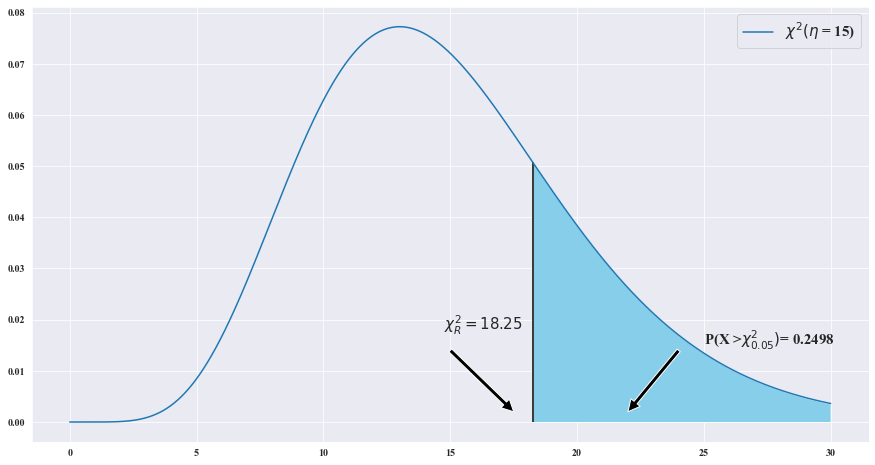

In [121]:
matplotlib.rc("font" , family = "Times New Roman" , weight = "bold")

X = np.arange(0,30,.01)

fig = plt.figure(figsize=(15,8))
dof = 15 #자유도

ax = sns.lineplot(X , scipy.stats.chi2(dof).pdf(X))

X_r = 18.25
print(X_r)

chai = scipy.stats.chi2(dof).pdf(18.25)
print(chai)



ax.fill_between(X, scipy.stats.chi2(dof).pdf(X) , where = (X>=X_r) , facecolor = 'skyblue') # x값 , y값 , 0 , x조건 인곳 , 색깔
area = 1- scipy.stats.chi2(dof).cdf(X_r) #넓이 구하기!!!!!
print(area)
ax.text(25 , .015, 'P(X >' + r'$\chi^2_{0.05})$'  + f"= {round(area,4)}",fontsize=15)
plt.annotate('' , xy=(22, .002), xytext=(24 , .014)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= X_r, ymin= 0 , ymax= scipy.stats.chi2(dof).pdf(X_r) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))


ax.text(X_r - 3.5, .018,  r'$\chi^2_R= {}$'.format(round(X_r,2)) ,fontsize=15)
plt.annotate('' , xy=(17.5, .002), xytext=(15 , .014)  , arrowprops = dict(facecolor = 'black'))


b = [r'$\chi^2(\eta$ = {})'.format(15)]
print(b)
plt.legend(b , fontsize = 15)

In [124]:
a = [12.5 , 11.5 , 6.0, 5.5 , 15.5 , 11.5 , 10.5 , 17.5 , 10.0 , 9.5 , 13.5 , 8.5 , 11.5 , 15.5 , 10.5]

print(np.mean(a))
print(np.var(a , ddof = 1))

11.3
11.135714285714286


In [125]:
print(14 * 11.1357 / 8.03)

19.414669987546702


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


19.414
0.04366139417781637
0.14972531566818337
['$\\chi^2(\\eta$ = 14)']


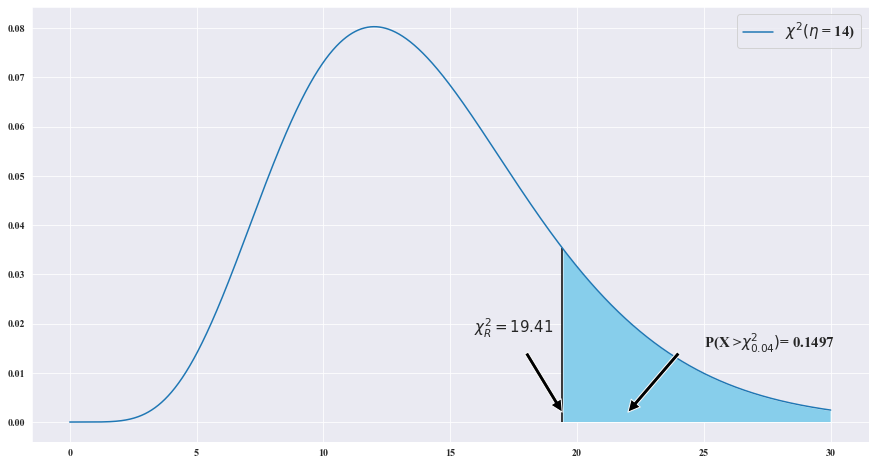

In [130]:
matplotlib.rc("font" , family = "Times New Roman" , weight = "bold")

X = np.arange(0,30,.01)

fig = plt.figure(figsize=(15,8))
dof = 14 #자유도

ax = sns.lineplot(X , scipy.stats.chi2(dof).pdf(X))

X_r = 19.414
print(X_r)

chai = scipy.stats.chi2(dof).pdf(18.25)
print(chai)



ax.fill_between(X, scipy.stats.chi2(dof).pdf(X) , where = (X>=X_r) , facecolor = 'skyblue') # x값 , y값 , 0 , x조건 인곳 , 색깔
area = 1- scipy.stats.chi2(dof).cdf(X_r) #넓이 구하기!!!!!
print(area)
ax.text(25 , .015, 'P(X >' + r'$\chi^2_{0.04})$'  + f"= {round(area,4)}",fontsize=15)
plt.annotate('' , xy=(22, .002), xytext=(24 , .014)  , arrowprops = dict(facecolor = 'black'))
ax.vlines(x= X_r, ymin= 0 , ymax= scipy.stats.chi2(dof).pdf(X_r) , color = 'black' , linestyle ='solid' , label ='{}'.format(2))


ax.text(X_r - 3.5, .018,  r'$\chi^2_R= {}$'.format(round(X_r,2)) ,fontsize=15)
plt.annotate('' , xy=(19.41, .002), xytext=(18 , .014)  , arrowprops = dict(facecolor = 'black'))


b = [r'$\chi^2(\eta$ = {})'.format(14)]
print(b)
plt.legend(b , fontsize = 15)